In [1]:
# 获取数据
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_table('gouwu.txt', sep='\t', engine="python", encoding='utf-8')
data.columns.values
data.head()

,购物距离注册时长,购物时是否咨询客服,是否团购,是否是新用户,是否直降,是否换购,是够满减,是否买赠,是够加价购,留存标签,咨询数量,同时购买同样物品数量
0,102,0,1,0,0,0,0,0,0,1,0,0
1,102,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,0,0,0,0,0,1,1,0,2
3,12,0,0,0,0,0,0,0,0,1,0,2
4,29,0,0,1,0,0,0,0,0,1,0,2


In [2]:
data.shape

(5951, 12)

In [3]:
data = data.drop(['留存标签'],axis=1)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
data_s = pd.DataFrame(scaler.fit_transform(data,y=data.columns)) 
data_s.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.629213,-1.188378,2.198707,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,-0.901794
1,1.629213,-1.188378,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,-0.901794
2,-0.429625,0.841483,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,3.883785,-0.269779,0.736105
3,-1.221485,-1.188378,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,0.736105
4,-0.683020,-1.188378,-0.454813,1.232670,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,0.736105


In [5]:
new_col = ['购物距离注册时长', '购物时是否咨询客服', '是否团购',
           '是否是新用户','是否直降','是否换购','是够满减','是否买赠',
          '是够加价购','咨询数量','同时购买同样物品数量']
data_s.columns = new_col
data_s.head()

,购物距离注册时长,购物时是否咨询客服,是否团购,是否是新用户,是否直降,是否换购,是够满减,是否买赠,是够加价购,咨询数量,同时购买同样物品数量
0,1.629213,-1.188378,2.198707,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,-0.901794
1,1.629213,-1.188378,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,-0.901794
2,-0.429625,0.841483,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,3.883785,-0.269779,0.736105
3,-1.221485,-1.188378,-0.454813,-0.811247,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,0.736105
4,-0.683020,-1.188378,-0.454813,1.232670,-0.15859,0.0,-0.502572,0.0,-0.257481,-0.269779,0.736105


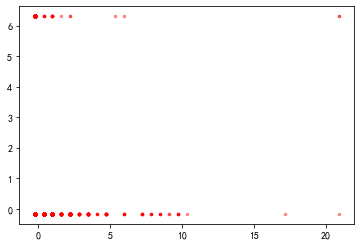

In [6]:
# 查看元数据散点图
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']     # win
# plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(data_s['咨询数量'],data_s['是否直降'], s=6, c='r', 
            alpha=0.4, label='散点1')
plt.show()

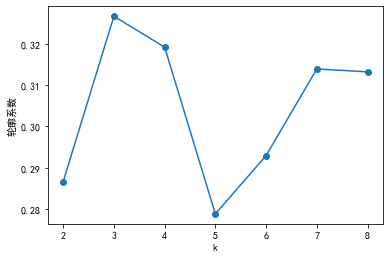

In [7]:
# 轮廓系数
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering  #  层次聚类
rand = []  
plt.rcParams['font.family'] = ['SimHei']     # win
# plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    rand.append(metrics.silhouette_score(data_s,estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, rand, 'o-')
plt.show()

In [8]:
# 轮廓系数
from sklearn import metrics
metrics.silhouette_score(data_s,estimator.labels_, metric='euclidean')

0.3132080711494989

In [9]:
# 层次聚类
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
# ward:使得方差最小
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
res = clustering.fit(data_s)

In [10]:
res.labels_    #  X对应index列表 # 留存标签

array([0, 1, 2, ..., 1, 1, 1], dtype=int64)

0
[ True False False ... False False False]
1
[False  True False ...  True  True  True]
2
[False False  True ... False False False]


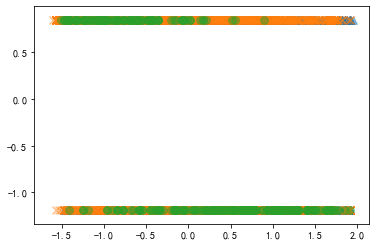

In [11]:
#画图
markers = ['^', 'x', 'o', '*']
for i in range(3):
    print(i)
    members = res.labels_ == i
    print(members)
    plt.scatter(data_s.values[members,0], data_s.values[members,1], s=60, 
                marker=markers[i], alpha=0.5)
plt.title('')
plt.show()

In [12]:
from pandas.core.frame import DataFrame
c_preds = DataFrame(res.labels_ )
c_preds.rename(columns={0:'标签'},inplace=True)
c_preds

,标签
0,0
1,1
2,2
3,1
4,1
...,...
5946,1
5947,2
5948,1
5949,1


In [13]:
# 数据组合
dataju = pd.concat([data,c_preds],axis=1 )
dataju.head()

,购物距离注册时长,购物时是否咨询客服,是否团购,是否是新用户,是否直降,是否换购,是够满减,是否买赠,是够加价购,咨询数量,同时购买同样物品数量,标签
0,102,0,1,0,0,0,0,0,0,0,0,0
1,102,0,0,0,0,0,0,0,0,0,0,1
2,37,1,0,0,0,0,0,0,1,0,2,2
3,12,0,0,0,0,0,0,0,0,0,2,1
4,29,0,0,1,0,0,0,0,0,0,2,1


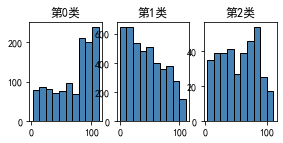

In [14]:
# 绘制子图
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].购物距离注册时长, # 指定绘图数据
             bins = 10, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

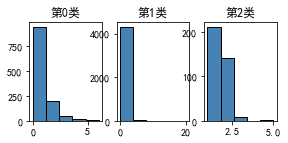

In [15]:
# 绘制子图
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].同时购买同样物品数量, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

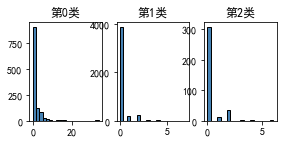

In [16]:
# 绘制子图
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].咨询数量, # 指定绘图数据
             bins = 20, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

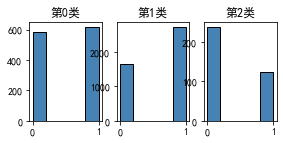

In [17]:
# 绘制子图
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].购物时是否咨询客服, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

### 用户画像（聚类）

- 读取数据
- 数据清洗（异常值）
- 标准化（减少计算量）
- 选择K值（肘部法（快）、轮廓（慢））
- 建模型（初始化方式、调参数）
- 聚完类（给类别一个定义）
- 绘制子图（特征数值对类别的影响）
- 把所有子图组合，形成用户画像